#### Native Python dates and times: datetime and dateutil

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

#### The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. 

Where they break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

#### Typed arrays of times: NumPy's datetime64

In [3]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [4]:
# Once we have this date formatted, however, we can quickly do vectorized 
# operations on it:

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

#### day-based datetime:

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

#### minute-based datetime:

In [7]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

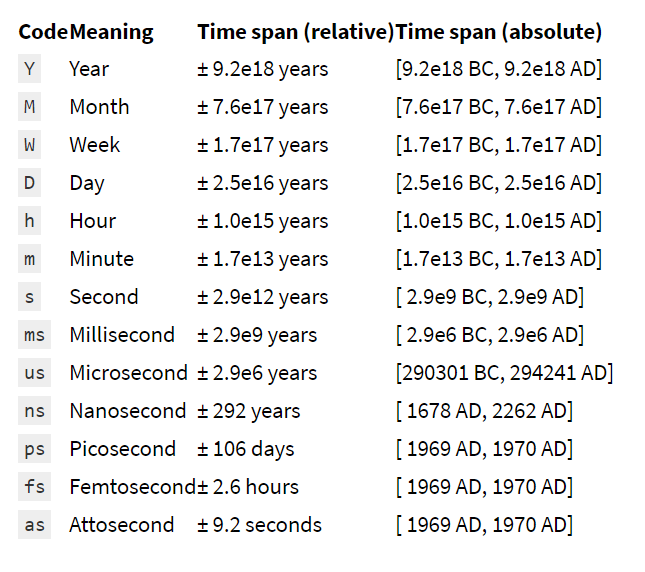

#### Dates and times in pandas: best of both worlds

In [8]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [9]:
date.strftime('%A')

'Saturday'

In [10]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

#### andas Time Series: Indexing by Time
Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [11]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [12]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [13]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Pandas Time Series Data Structures

- For time stamps, Pandas provides the __Timestamp__ type. it is essentially a replacement for Python's native __datetime__, but is based on the more efficient __numpy.datetime64__ data type. The associated Index structure is __DatetimeIndex__.


- For time Periods, Pandas provides the __Period__ type. This encodes a fixed-frequency interval based on __numpy.datetime64__. The associated index structure is __PeriodIndex__.


- For time deltas or durations, Pandas provides the __Timedelta__ type. Timedelta is a more efficient replacement for Python's native __datetime.timedelta__ type, and is based on numpy.timedelta64. The associated index structure is __TimedeltaIndex__.

e.g. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [16]:
dates = pd.to_datetime([datetime(2015, 7, 3), 
                        '4th of July, 2015',
                        '2015-Jul-6', 
                        '07-07-2015', 
                        '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [18]:
# Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function 
# with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [22]:
print(dates[0])
print(dates[1])


2015-07-03 00:00:00
2015-07-04 00:00:00


In [19]:
# A TimedeltaIndex is created, for example, when a date is subtracted from another:

dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [20]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

#### date range

In [23]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [24]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range('2015-07-03', periods=8, freq='D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [30]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [66]:
# This date range has timestamps with an hourly frequency.
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')

In [67]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [68]:
df.head()

,date,data
0,2018-01-01 00:00:00,18
1,2018-01-01 01:00:00,23
2,2018-01-01 02:00:00,86
3,2018-01-01 03:00:00,53
4,2018-01-01 04:00:00,37


#### Convert the data frame index to a datetime index then show the first elements:

In [60]:
df['datetime1'] = pd.to_datetime(df['date'])

In [69]:
df = df.set_index('date')
df.head()

,data
date,
2018-01-01 00:00:00,18
2018-01-01 01:00:00,23
2018-01-01 02:00:00,86
2018-01-01 03:00:00,53
2018-01-01 04:00:00,37


#### Resampling, Shifting, and Windowing

In [37]:
# pip install pandas-datareader
# how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. 
# Here we will load Google's closing price history:
from pandas_datareader import data
import pandas_datareader.data as web
import datetime

> Google Finance, 
Morningstar, 
IEX, 
Robinhood, 
Enigma, 
Quandl, 
St.Louis FED (FRED), 
Kenneth French’s data library, 
World Bank, 
OECD, 
Eurostat, 
Thrift Savings Plan, 
Nasdaq Trader symbol definitions, 
Stooq, 
MOEX 

In [39]:
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2013, 1, 27)

In [40]:
f = web.DataReader('F', 'google', start, end)

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [35]:
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues
